In [1]:
%matplotlib inline

In [31]:
import pandas as pd
import numpy as np


In [3]:
housing_data=pd.read_csv("../austinHousingData.csv")
housing_data.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [4]:
housing_data.columns

Index(['zpid', 'city', 'streetAddress', 'zipcode', 'description', 'latitude',
       'longitude', 'propertyTaxRate', 'garageSpaces', 'hasAssociation',
       'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView',
       'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'homeImage'],
      dtype='object')

In [5]:
#pull out unused information
descriptiveinfo=housing_data[["zpid", "streetAddress", "latitude", "longitude", "description", "homeImage", "latestPriceSource"]].copy()
descriptiveinfo.head()

,zpid,streetAddress,latitude,longitude,description,homeImage,latestPriceSource
0,111373431,14424 Lake Victor Dr,30.430632,-97.663078,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...,"Coldwell Banker United, Realtors - South Austin"
1,120900430,1104 Strickling Dr,30.432673,-97.661697,Absolutely GORGEOUS 4 Bedroom home with 2 full...,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...,Agent Provided
2,2084491383,1408 Fort Dessau Rd,30.409748,-97.639771,Under construction - estimated completion in A...,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...,Agent Provided
3,120901374,1025 Strickling Dr,30.432112,-97.661659,Absolutely darling one story home in charming ...,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...,Agent Provided
4,60134862,15005 Donna Jane Loop,30.437368,-97.656860,Brimming with appeal & warm livability! Sleek ...,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg,Agent Provided


In [6]:
#create regression data
regressiondata=housing_data.drop(columns=["streetAddress","description", "homeImage", "latestPriceSource"])
regressiondata.head()

,zpid,city,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
0,111373431,pflugerville,78660,30.430632,-97.663078,1.98,2,True,True,True,...,0,1,1,1.266667,2.666667,1063,14,3.0,4,2
1,120900430,pflugerville,78660,30.432673,-97.661697,1.98,2,True,True,True,...,0,1,1,1.400000,2.666667,1063,14,2.0,4,1
2,2084491383,pflugerville,78660,30.409748,-97.639771,1.98,0,True,True,False,...,2,1,1,1.200000,3.000000,1108,14,2.0,3,1
3,120901374,pflugerville,78660,30.432112,-97.661659,1.98,2,True,True,True,...,0,1,1,1.400000,2.666667,1063,14,2.0,3,1
4,60134862,pflugerville,78660,30.437368,-97.656860,1.98,0,True,True,False,...,0,1,1,1.133333,4.000000,1223,14,3.0,3,2


In [7]:
#create data frame with just data information
dateinfo=housing_data[["zpid", "streetAddress", "latitude", "longitude", 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPrice']]
dateinfo.head()

,zpid,streetAddress,latitude,longitude,latest_saledate,latest_salemonth,latest_saleyear,latestPrice
0,111373431,14424 Lake Victor Dr,30.430632,-97.663078,2019-09-02,9,2019,305000.0
1,120900430,1104 Strickling Dr,30.432673,-97.661697,2020-10-13,10,2020,295000.0
2,2084491383,1408 Fort Dessau Rd,30.409748,-97.639771,2019-07-31,7,2019,256125.0
3,120901374,1025 Strickling Dr,30.432112,-97.661659,2018-08-08,8,2018,240000.0
4,60134862,15005 Donna Jane Loop,30.437368,-97.656860,2018-10-31,10,2018,239900.0


In [8]:
#what columns need to be changed

#bool: hasAssociation, hasCooling, hasGarage, hasHeating, hasSpa, hasView
#object: city, homeType, latest_saledate

regressiondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   zipcode                     15171 non-null  int64  
 3   latitude                    15171 non-null  float64
 4   longitude                   15171 non-null  float64
 5   propertyTaxRate             15171 non-null  float64
 6   garageSpaces                15171 non-null  int64  
 7   hasAssociation              15171 non-null  bool   
 8   hasCooling                  15171 non-null  bool   
 9   hasGarage                   15171 non-null  bool   
 10  hasHeating                  15171 non-null  bool   
 11  hasSpa                      15171 non-null  bool   
 12  hasView                     15171 non-null  bool   
 13  homeType                    151

In [9]:
#convert bool to int
regressiondata[['hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView']] = regressiondata[['hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView']].astype(int)
regressiondata.head()

,zpid,city,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
0,111373431,pflugerville,78660,30.430632,-97.663078,1.98,2,1,1,1,...,0,1,1,1.266667,2.666667,1063,14,3.0,4,2
1,120900430,pflugerville,78660,30.432673,-97.661697,1.98,2,1,1,1,...,0,1,1,1.400000,2.666667,1063,14,2.0,4,1
2,2084491383,pflugerville,78660,30.409748,-97.639771,1.98,0,1,1,0,...,2,1,1,1.200000,3.000000,1108,14,2.0,3,1
3,120901374,pflugerville,78660,30.432112,-97.661659,1.98,2,1,1,1,...,0,1,1,1.400000,2.666667,1063,14,2.0,3,1
4,60134862,pflugerville,78660,30.437368,-97.656860,1.98,0,1,1,0,...,0,1,1,1.133333,4.000000,1223,14,3.0,3,2


In [10]:
#convert date
regressiondata['latest_saledate']= pd.to_datetime(regressiondata['latest_saledate'])
regressiondata.head()

,zpid,city,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
0,111373431,pflugerville,78660,30.430632,-97.663078,1.98,2,1,1,1,...,0,1,1,1.266667,2.666667,1063,14,3.0,4,2
1,120900430,pflugerville,78660,30.432673,-97.661697,1.98,2,1,1,1,...,0,1,1,1.400000,2.666667,1063,14,2.0,4,1
2,2084491383,pflugerville,78660,30.409748,-97.639771,1.98,0,1,1,0,...,2,1,1,1.200000,3.000000,1108,14,2.0,3,1
3,120901374,pflugerville,78660,30.432112,-97.661659,1.98,2,1,1,1,...,0,1,1,1.400000,2.666667,1063,14,2.0,3,1
4,60134862,pflugerville,78660,30.437368,-97.656860,1.98,0,1,1,0,...,0,1,1,1.133333,4.000000,1223,14,3.0,3,2


In [11]:
#get dummies
regressiondata3=pd.get_dummies(regressiondata)
regressiondata3.head()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,...,homeType_Apartment,homeType_Condo,homeType_Mobile / Manufactured,homeType_MultiFamily,homeType_Multiple Occupancy,homeType_Other,homeType_Residential,homeType_Single Family,homeType_Townhouse,homeType_Vacant Land
0,111373431,78660,30.430632,-97.663078,1.98,2,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1,120900430,78660,30.432673,-97.661697,1.98,2,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
2,2084491383,78660,30.409748,-97.639771,1.98,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,120901374,78660,30.432112,-97.661659,1.98,2,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
4,60134862,78660,30.437368,-97.656860,1.98,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [12]:
regressiondata3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   zpid                            15171 non-null  int64         
 1   zipcode                         15171 non-null  int64         
 2   latitude                        15171 non-null  float64       
 3   longitude                       15171 non-null  float64       
 4   propertyTaxRate                 15171 non-null  float64       
 5   garageSpaces                    15171 non-null  int64         
 6   hasAssociation                  15171 non-null  int32         
 7   hasCooling                      15171 non-null  int32         
 8   hasGarage                       15171 non-null  int32         
 9   hasHeating                      15171 non-null  int32         
 10  hasSpa                          15171 non-null  int32         
 11  ha

In [13]:
regressiondata3.to_csv("regressiondata.csv")

In [24]:
dateinfo.to_csv("dateinfo.csv")

In [25]:
descriptiveinfo.to_csv("descriptiveinfo.csv")

In [13]:
regressiondata3.describe()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,...,homeType_Apartment,homeType_Condo,homeType_Mobile / Manufactured,homeType_MultiFamily,homeType_Multiple Occupancy,homeType_Other,homeType_Residential,homeType_Single Family,homeType_Townhouse,homeType_Vacant Land
count,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,...,15171.000000,15171.00000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.044193e+08,78735.932964,30.291596,-97.778532,1.994085,1.229187,0.527783,0.981939,0.550129,0.990179,...,0.002439,0.03098,0.001121,0.000659,0.006328,0.000395,0.002439,0.938699,0.011469,0.005471
std,3.179426e+08,18.893475,0.096973,0.084715,0.053102,1.352117,0.499244,0.133176,0.497497,0.098618,...,0.049326,0.17327,0.033457,0.025666,0.079298,0.019884,0.049326,0.239890,0.106482,0.073766
min,2.858495e+07,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.941115e+07,78727.000000,30.203313,-97.838009,1.980000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2.949441e+07,78739.000000,30.284416,-97.769539,1.980000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.033762e+07,78749.000000,30.366585,-97.717903,1.980000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2.146313e+09,78759.000000,30.517323,-97.569504,2.210000,22.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
regressiondata3[['hasSpa', 'hasView', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'numOfPhotos',]].describe()

,hasSpa,hasView,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_salemonth,latest_saleyear,numOfPhotos
count,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000
mean,0.079032,0.227737,1.224507,1988.554743,5.127677e+05,3.032892,6.733043,2019.078241,30.640432
std,0.269798,0.419386,1.352732,21.579458,4.531853e+05,2.487392,3.146760,0.813941,21.175174
min,0.000000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,1.000000,2018.000000,1.000000
25%,0.000000,0.000000,0.000000,1974.000000,3.090000e+05,1.000000,4.000000,2018.000000,20.000000
50%,0.000000,0.000000,1.000000,1993.000000,4.050000e+05,2.000000,7.000000,2019.000000,29.000000
75%,0.000000,0.000000,2.000000,2006.000000,5.750000e+05,4.000000,9.000000,2020.000000,39.000000
max,1.000000,1.000000,22.000000,2020.000000,1.350000e+07,23.000000,12.000000,2021.000000,179.000000


In [15]:
regressiondata3[['numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt']].describe()

 

,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt
count,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04
mean,0.012985,3.474722,1.710105,0.663371,0.466878,0.002768,0.208490,0.018852,1.190840e+05
std,0.179438,1.893351,0.788641,0.983779,0.824481,0.061771,0.488331,0.206775,1.225272e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+02
25%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.534000e+03
50%,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.276000e+03
75%,0.000000,4.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.089000e+04
max,8.000000,12.000000,6.000000,8.000000,6.000000,2.000000,4.000000,8.000000,1.508483e+09


In [16]:
regressiondata3[['livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories']].describe()

,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,2208.323314,0.940676,0.049173,1.035990,0.976798,1.838495,5.779912,1237.304660,14.857228,2.683010,3.440380,1.467273
std,1378.576119,0.236516,0.234937,0.263633,0.292043,1.068376,1.860276,326.513311,1.741857,1.054445,0.849942,0.523697
min,300.000000,0.000000,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,1483.000000,1.000000,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,1975.000000,1.000000,0.000000,1.000000,1.000000,1.566667,5.778694,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,2687.000000,1.000000,0.000000,1.000000,1.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000
max,109292.000000,2.000000,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


In [18]:
# Remove: has cooling (98% have cooling), heating (99% have heating), should group home types (94% single family), Accessibility features (1%), water features (.002), community features (2%), 

In [17]:
regressiondata4 = regressiondata3.drop(columns=['hasCooling', 'hasHeating', 'numOfAccessibilityFeatures', 'numOfWaterfrontFeatures', 'numOfCommunityFeatures'])
regressiondata4.head()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasGarage,hasSpa,hasView,...,homeType_Apartment,homeType_Condo,homeType_Mobile / Manufactured,homeType_MultiFamily,homeType_Multiple Occupancy,homeType_Other,homeType_Residential,homeType_Single Family,homeType_Townhouse,homeType_Vacant Land
0,111373431,78660,30.430632,-97.663078,1.98,2,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,120900430,78660,30.432673,-97.661697,1.98,2,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2084491383,78660,30.409748,-97.639771,1.98,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,120901374,78660,30.432112,-97.661659,1.98,2,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,60134862,78660,30.437368,-97.656860,1.98,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
regressiondata['homeType'].value_counts()

Single Family            14241
Condo                      470
Townhouse                  174
Multiple Occupancy          96
Vacant Land                 83
Apartment                   37
Residential                 37
Mobile / Manufactured       17
MultiFamily                 10
Other                        6
Name: homeType, dtype: int64

In [19]:
# remove all other homeType columns, become 1 for single family 0 for all other

regressiondata4.drop(columns=['homeType_Apartment', 'homeType_Condo', 'homeType_Mobile / Manufactured', 'homeType_MultiFamily', 'homeType_Multiple Occupancy','homeType_Other', 'homeType_Residential', 'homeType_Townhouse', 'homeType_Vacant Land'], inplace=True)
regressiondata4.head()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasGarage,hasSpa,hasView,...,city_austin,city_del valle,city_driftwood,city_dripping springs,city_manchaca,city_manor,city_pflugerville,city_road,city_west lake hills,homeType_Single Family
0,111373431,78660,30.430632,-97.663078,1.98,2,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,120900430,78660,30.432673,-97.661697,1.98,2,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2084491383,78660,30.409748,-97.639771,1.98,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,120901374,78660,30.432112,-97.661659,1.98,2,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,60134862,78660,30.437368,-97.656860,1.98,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


<AxesSubplot:xlabel='[homeType_Single Family]', ylabel='[latestPrice]'>

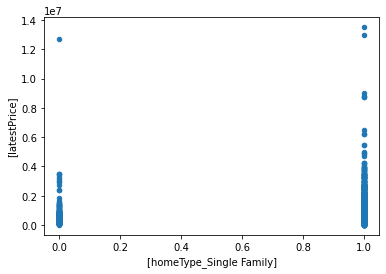

In [20]:
regressiondata4.plot.scatter(x=['homeType_Single Family'], y=['latestPrice'])

<AxesSubplot:xlabel='[hasHeating]', ylabel='[latestPrice]'>

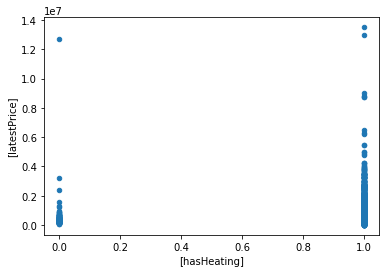

In [21]:
regressiondata3.plot.scatter(x=['hasHeating'], y=['latestPrice'])

KeyboardInterrupt: 

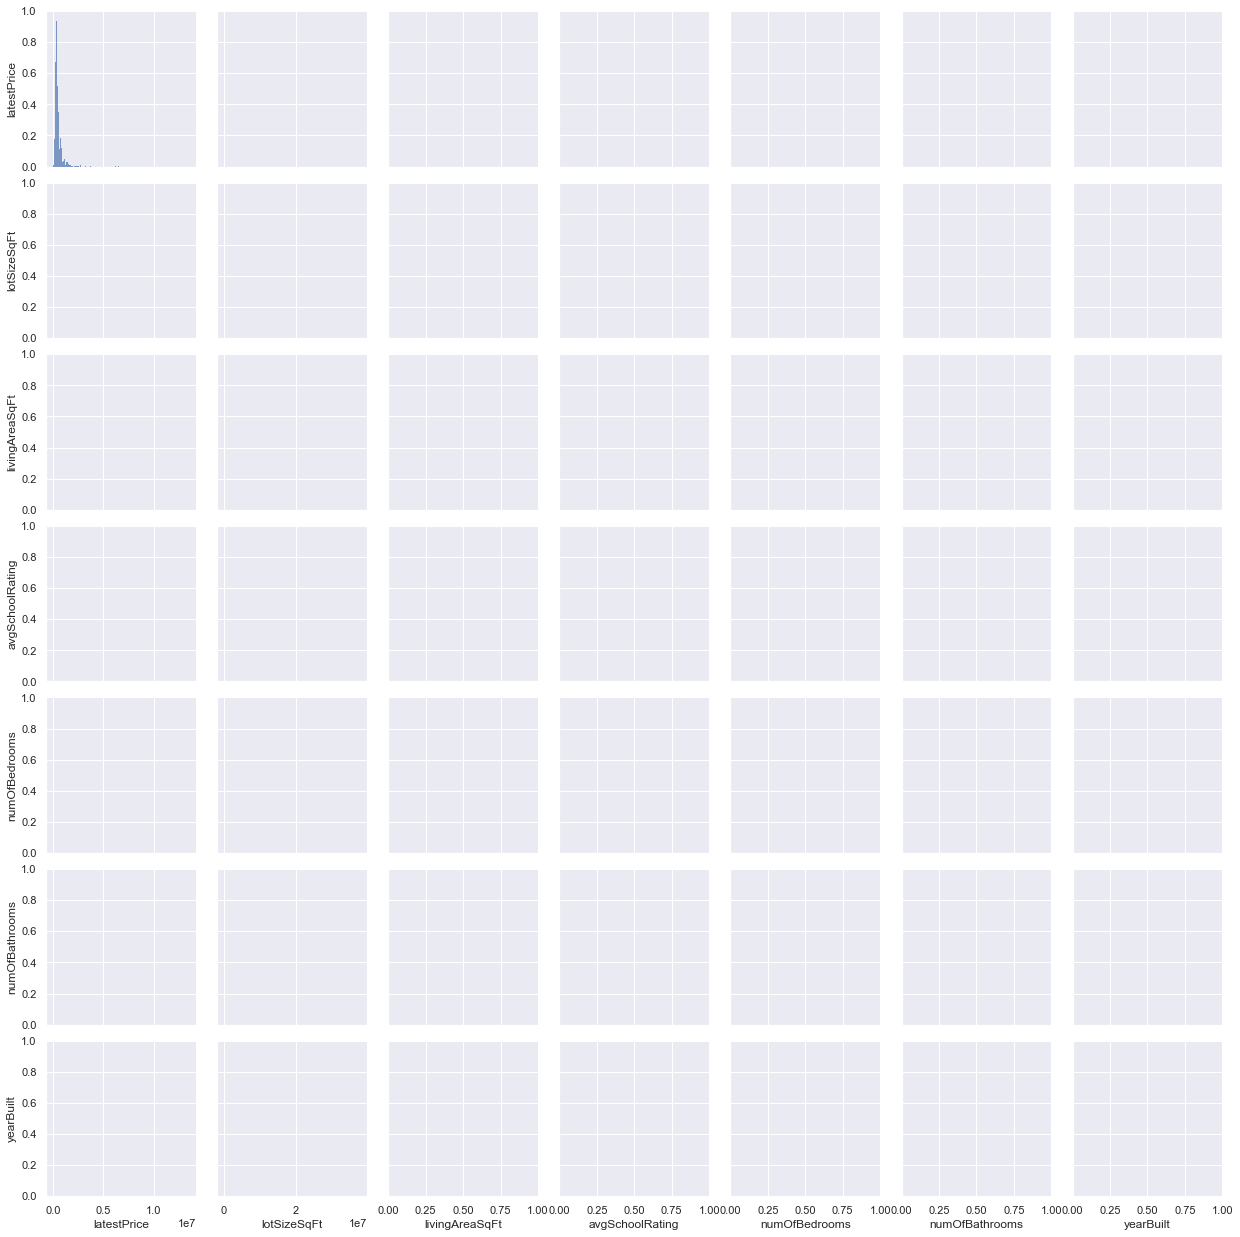

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

#scatterplot
sns.set()
cols = ['latestPrice', 'lotSizeSqFt', 'livingAreaSqFt', 'avgSchoolRating', 'numOfBedrooms', 'numOfBathrooms', 'yearBuilt']
sns.pairplot(regressiondata4[cols], height = 2.5)
plt.show();

<AxesSubplot:xlabel='[lotSizeSqFt]', ylabel='[latestPrice]'>

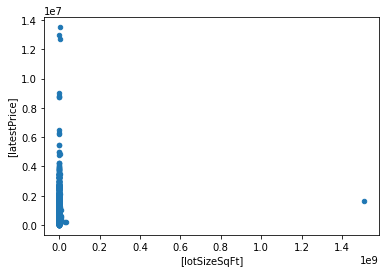

In [22]:
regressiondata4.plot.scatter(x=['lotSizeSqFt'], y=['latestPrice'])

#look at outlier

<AxesSubplot:xlabel='[livingAreaSqFt]', ylabel='[latestPrice]'>

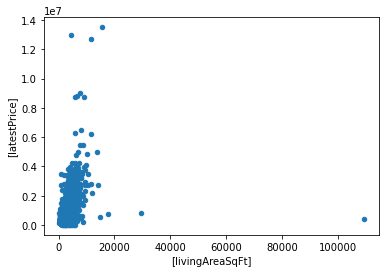

In [23]:
regressiondata4.plot.scatter(x=['livingAreaSqFt'], y=['latestPrice'])

<AxesSubplot:xlabel='[avgSchoolRating]', ylabel='[latestPrice]'>

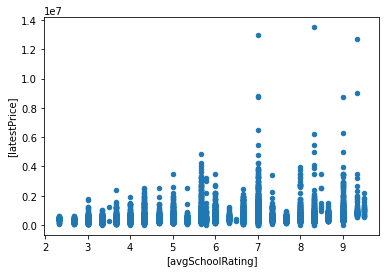

In [24]:
regressiondata4.plot.scatter(x=['avgSchoolRating'], y=['latestPrice'])

<AxesSubplot:xlabel='[numOfBedrooms]', ylabel='[latestPrice]'>

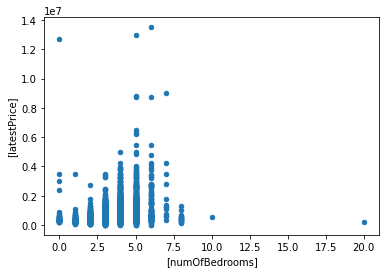

In [25]:
regressiondata4.plot.scatter(x=['numOfBedrooms'], y=['latestPrice'])

<AxesSubplot:xlabel='[numOfBathrooms]', ylabel='[latestPrice]'>

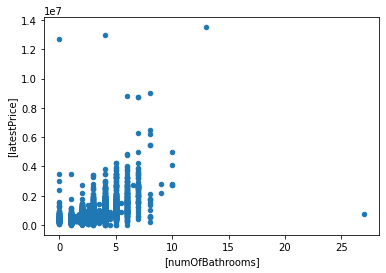

In [26]:
regressiondata4.plot.scatter(x=['numOfBathrooms'], y=['latestPrice'])

<AxesSubplot:xlabel='[yearBuilt]', ylabel='[latestPrice]'>

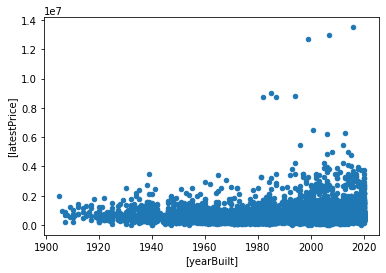

In [27]:
regressiondata4.plot.scatter(x=['yearBuilt'], y=['latestPrice'])

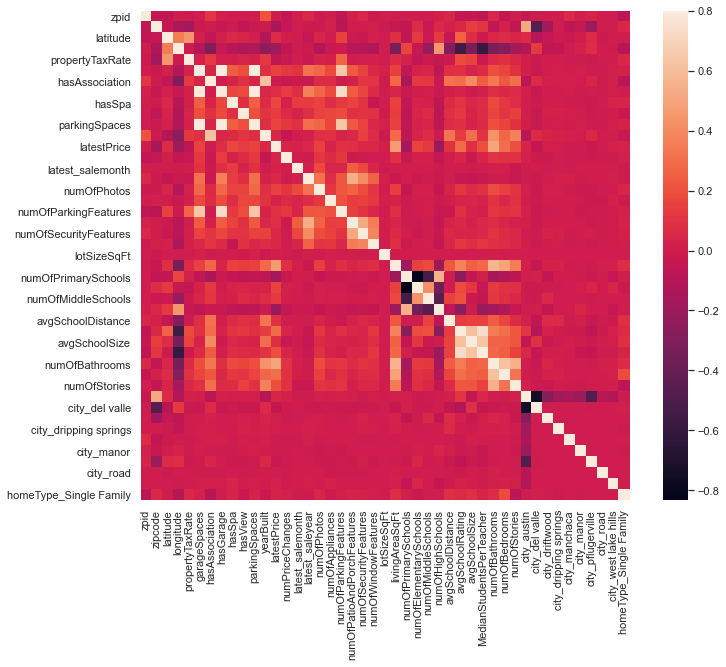

In [29]:
corrmat = regressiondata4.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

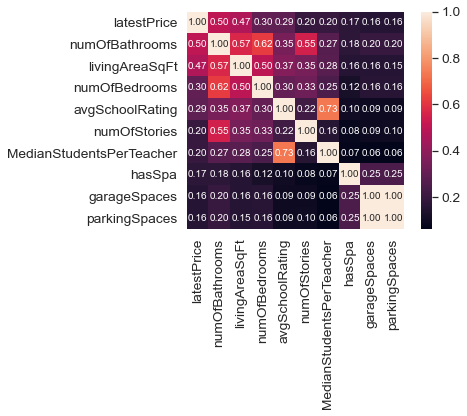

Index(['latestPrice', 'numOfBathrooms', 'livingAreaSqFt', 'numOfBedrooms',
       'avgSchoolRating', 'numOfStories', 'MedianStudentsPerTeacher', 'hasSpa',
       'garageSpaces', 'parkingSpaces'],
      dtype='object')


In [56]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'latestPrice')['latestPrice'].index
cm = np.corrcoef(regressiondata4[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
print(cols)

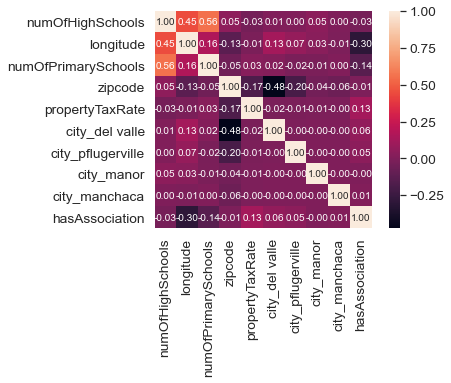

Index(['numOfHighSchools', 'longitude', 'numOfPrimarySchools', 'zipcode',
       'propertyTaxRate', 'city_del valle', 'city_pflugerville', 'city_manor',
       'city_manchaca', 'hasAssociation'],
      dtype='object')


In [55]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nsmallest(k, 'latestPrice')['latestPrice'].index
cm = np.corrcoef(regressiondata4[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
print(cols)

In [40]:
# pull out outlier - 25 bathrooms
oddrow1 = regressiondata4[regressiondata['numOfBathrooms'] >= 25]
oddrow[['numOfBathrooms', 'numOfBedrooms', 'livingAreaSqFt']]


,numOfBathrooms,numOfBedrooms,livingAreaSqFt
2838,27.0,4,2137.0


In [49]:
oddrow2 = regressiondata4[regressiondata['numOfBedrooms'] >= 10]
oddrow2[['numOfBathrooms', 'numOfBedrooms', 'livingAreaSqFt','lotSizeSqFt']]


,numOfBathrooms,numOfBedrooms,livingAreaSqFt,lotSizeSqFt
5103,7.0,10,3725.0,12632.4
8597,2.0,20,916.0,5227.0


In [52]:
oddrow3 = regressiondata4[regressiondata['lotSizeSqFt'] >= 10000000]
oddrow3[['numOfBathrooms', 'numOfBedrooms', 'livingAreaSqFt','lotSizeSqFt']]


,numOfBathrooms,numOfBedrooms,livingAreaSqFt,lotSizeSqFt
9244,1.0,2,728.0,3.415452e+07
11116,2.0,2,815.0,2.617956e+07
14654,4.0,4,3328.0,1.508483e+09


In [53]:
oddrow4 = regressiondata4[regressiondata['livingAreaSqFt'] >= 40000]
oddrow4[['numOfBathrooms', 'numOfBedrooms', 'livingAreaSqFt']]


,numOfBathrooms,numOfBedrooms,livingAreaSqFt
705,0.0,5,109292.0


In [54]:
# remove rows: 2838, 8597, 14654, 705
regressiondata5=regressiondata4.drop([2838, 8597, 14654, 705])
regressiondata5

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasGarage,hasSpa,hasView,...,city_austin,city_del valle,city_driftwood,city_dripping springs,city_manchaca,city_manor,city_pflugerville,city_road,city_west lake hills,homeType_Single Family
0,111373431,78660,30.430632,-97.663078,1.98,2,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,120900430,78660,30.432673,-97.661697,1.98,2,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2084491383,78660,30.409748,-97.639771,1.98,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,120901374,78660,30.432112,-97.661659,1.98,2,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,60134862,78660,30.437368,-97.656860,1.98,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,29512934,78748,30.161997,-97.816345,1.98,6,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
15167,241937773,78741,30.240223,-97.772835,1.98,2,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1
15168,29473281,78704,30.244835,-97.761124,1.98,2,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
15169,29392029,78722,30.281569,-97.717789,1.98,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [58]:
# top 5 and bottom 5
#top 6 positive correlation: 'numOfBathrooms', 'livingAreaSqFt', 'numOfBedrooms', 'avgSchoolRating', 'numOfStories', 'MedianStudentsPerTeacher',
#top 5 most negative correlation: 'numOfHighSchools', 'longitude', 'numOfPrimarySchools', 'zipcode','propertyTaxRate'

regressiondata6=regressiondata5[['zpid', 'latestPrice', 'numOfBathrooms', 'livingAreaSqFt', 'numOfBedrooms', 'avgSchoolRating', 'numOfStories', 'MedianStudentsPerTeacher','numOfHighSchools', 'longitude', 'numOfPrimarySchools', 'zipcode','propertyTaxRate']]
regressiondata6

,zpid,latestPrice,numOfBathrooms,livingAreaSqFt,numOfBedrooms,avgSchoolRating,numOfStories,MedianStudentsPerTeacher,numOfHighSchools,longitude,numOfPrimarySchools,zipcode,propertyTaxRate
0,111373431,305000.0,3.0,2601.0,4,2.666667,2,14,1,-97.663078,1,78660,1.98
1,120900430,295000.0,2.0,1768.0,4,2.666667,1,14,1,-97.661697,1,78660,1.98
2,2084491383,256125.0,2.0,1478.0,3,3.000000,1,14,1,-97.639771,0,78660,1.98
3,120901374,240000.0,2.0,1678.0,3,2.666667,1,14,1,-97.661659,1,78660,1.98
4,60134862,239900.0,3.0,2132.0,3,4.000000,2,14,1,-97.656860,1,78660,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,29512934,330000.0,2.0,1234.0,3,3.333333,1,14,1,-97.816345,1,78748,1.98
15167,241937773,550000.0,4.0,1888.0,3,6.666667,3,16,1,-97.772835,1,78741,1.98
15168,29473281,875000.0,3.0,1524.0,3,5.000000,2,13,1,-97.761124,1,78704,1.98
15169,29392029,420000.0,2.0,6068.0,4,6.666667,1,15,1,-97.717789,1,78722,1.98


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='[lotSizeSqFt]', ylabel='[latestPrice]'>

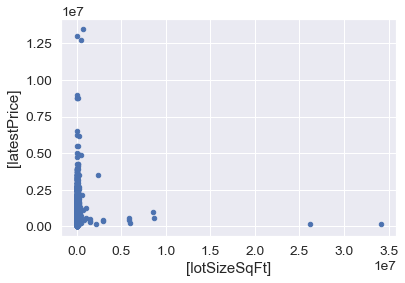

In [60]:
regressiondata5.plot.scatter(x=['lotSizeSqFt'], y=['latestPrice'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='[numOfBathrooms]', ylabel='[latestPrice]'>

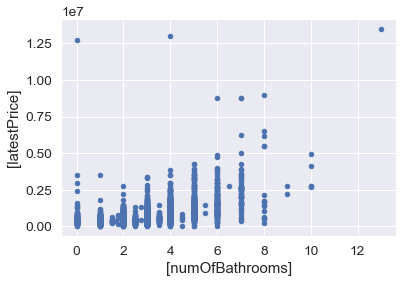

In [62]:
regressiondata6.plot.scatter(x=['numOfBathrooms'], y=['latestPrice'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='[livingAreaSqFt]', ylabel='[latestPrice]'>

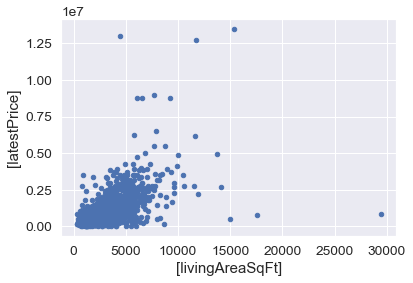

In [63]:
regressiondata6.plot.scatter(x=['livingAreaSqFt'], y=['latestPrice'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='[numOfBedrooms]', ylabel='[latestPrice]'>

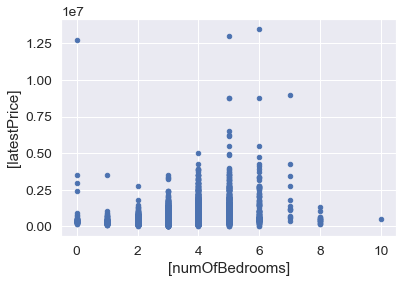

In [64]:
regressiondata6.plot.scatter(x=['numOfBedrooms'], y=['latestPrice'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='[numOfStories]', ylabel='[latestPrice]'>

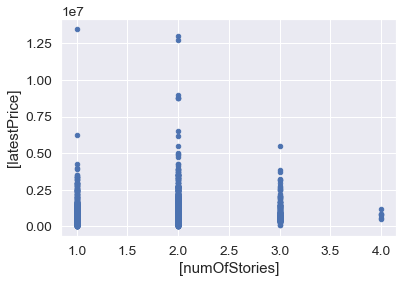

In [65]:
regressiondata6.plot.scatter(x=['numOfStories'], y=['latestPrice'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='[MedianStudentsPerTeacher]', ylabel='[latestPrice]'>

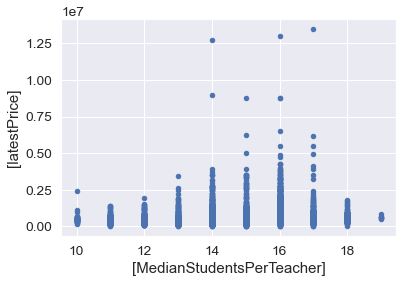

In [66]:
regressiondata6.plot.scatter(x=['MedianStudentsPerTeacher'], y=['latestPrice'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='[numOfHighSchools]', ylabel='[latestPrice]'>

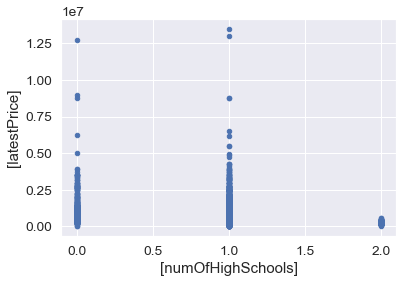

In [67]:
regressiondata6.plot.scatter(x=['numOfHighSchools'], y=['latestPrice'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='[longitude]', ylabel='[latestPrice]'>

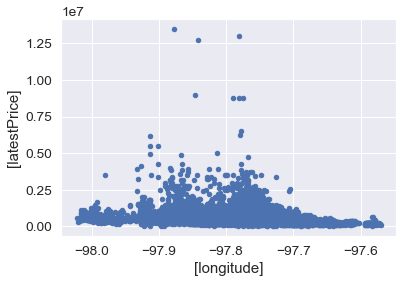

In [68]:
regressiondata6.plot.scatter(x=['longitude'], y=['latestPrice'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='[zipcode]', ylabel='[latestPrice]'>

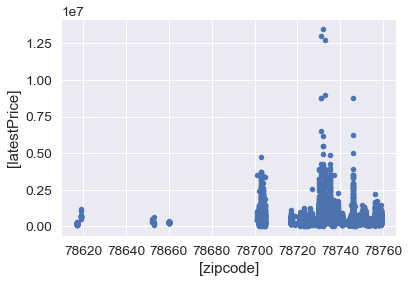

In [69]:
regressiondata6.plot.scatter(x=['zipcode'], y=['latestPrice'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='[propertyTaxRate]', ylabel='[latestPrice]'>

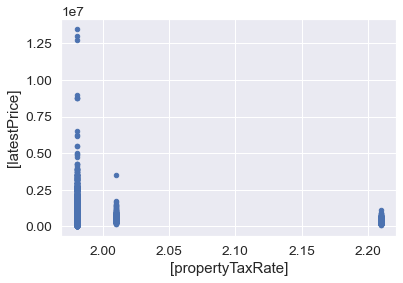

In [70]:
regressiondata6.plot.scatter(x=['propertyTaxRate'], y=['latestPrice'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='[numOfPrimarySchools]', ylabel='[latestPrice]'>

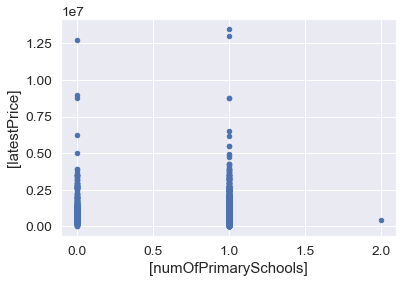

In [71]:
regressiondata6.plot.scatter(x=['numOfPrimarySchools'], y=['latestPrice'])

In [ ]:
# new table with average price by zipcode per year


In [ ]:
# split data into 3 tables by year include average zipcode price column

In [ ]:
# add to pgAdmin here

In [ ]:
# do join in pgAdmin

In [47]:
housing_data.nunique()

zpid                          15171
city                              9
streetAddress                 15164
zipcode                          48
description                   15133
latitude                      14410
longitude                     12480
propertyTaxRate                   3
garageSpaces                     14
hasAssociation                    2
hasCooling                        2
hasGarage                         2
hasHeating                        2
hasSpa                            2
hasView                           2
homeType                         10
parkingSpaces                    14
yearBuilt                       115
latestPrice                    2365
numPriceChanges                  22
latest_saledate                 958
latest_salemonth                 12
latest_saleyear                   4
latestPriceSource               225
numOfPhotos                     151
numOfAccessibilityFeatures        8
numOfAppliances                  13
numOfParkingFeatures        